# Interactive lab:  Data import, calculations, and visualization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# 1) Read in data into a pandas df

This data contains metrics calculated for each hour, for each bee, during heat stress trial 2 of:
Jhawar, Jitesh, Jacob D. Davidson, Anja Weidenmüller, Benjamin Wild, David M. Dormagen, Tim Landgraf, Iain D. Couzin, and Michael L. Smith. 2023. “How Honeybees Respond to Heat Stress from the Individual to Colony Level.” Journal of The Royal Society Interface 20 (207): 20230290. https://doi.org/10.1098/rsif.2023.0290.

To download file from repository

In [4]:
#url = 'https://github.com/calovids/IMPRS-Python-Workshop/blob/main/data/heatstress_trial2_hour.csv?raw=true'
#df = pd.read_csv(url)
#df.head()

To use local version (path assumes that downloaded Github repository)

In [5]:
df = pd.read_csv('../data/heatstress_trial2_hour.csv')
df.head()

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
0,81,0.0,4132.0,15.0,54.0,652.0,0.00000,0.007669,0.000000,0.000000,45.714000,2374.021483
1,81,0.0,4302.0,15.0,54.0,274.0,0.00365,0.000912,0.197080,0.000000,700.557193,2611.922950
2,81,0.0,4377.0,16.0,47.0,609.0,0.00000,0.003284,0.917898,6.708204,688.798089,3375.645272
3,81,0.0,4392.0,16.0,47.0,1308.0,0.00000,0.000000,0.999235,4.242641,109.220504,750.320598
4,81,0.0,4474.0,16.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2) Calculate average over individuals.
Calculate and store averages in a new variable. \
    a) Calculate an average of values in the dataframe, grouping by 'Bee unique ID'.  Note:  if you're stuck on how to calculate, you can use a loop instead.  Save as df_avg  \
    b) Calculate a weighted average of values in the dataframe, weighting by 'Num. observations'.  Save as df_avg_weighted

In [6]:
df_avg = df.groupby('Bee unique ID').mean()
df_avg.head()

,Day number,Hour,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Bee unique ID,,,,,,,,,,,
4132.0,81.0,11.5,15.0,54.0,1489.695652,0.007828,0.036877,0.329615,13.315324,544.393720,2322.074493
4302.0,81.0,11.5,15.0,54.0,138.250000,0.050655,0.089742,0.252464,5.475326,1014.936749,2840.498927
4377.0,81.0,11.5,16.0,47.0,2060.238095,0.134269,0.015098,0.384492,12.533556,672.408512,2943.269896
4392.0,81.0,11.5,16.0,47.0,1290.545455,0.000621,0.000234,0.904460,12.553964,231.176423,1125.995250
4474.0,81.0,11.5,16.0,47.0,1391.812500,0.001120,0.003723,0.942780,25.544207,369.441033,1089.084701


In [7]:
valid_df = df.dropna()
valid_df.head()

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
0,81,0.0,4132.0,15.0,54.0,652.0,0.00000,0.007669,0.000000,0.000000,45.714000,2374.021483
1,81,0.0,4302.0,15.0,54.0,274.0,0.00365,0.000912,0.197080,0.000000,700.557193,2611.922950
2,81,0.0,4377.0,16.0,47.0,609.0,0.00000,0.003284,0.917898,6.708204,688.798089,3375.645272
3,81,0.0,4392.0,16.0,47.0,1308.0,0.00000,0.000000,0.999235,4.242641,109.220504,750.320598
6,81,0.0,4604.0,16.0,47.0,1579.0,0.00000,0.000000,0.000000,3.000000,38.450142,2790.770682


In [8]:
df_avg_weighted = list(valid_df.groupby('Bee unique ID').apply(lambda x: np.average(x, weights=x['Num. observations'], axis=0)))
df_avg_weighted = pd.DataFrame(df_avg_weighted, index=df_avg.index, columns=df.columns)

In [9]:
df_avg_weighted.head()

,Day number,Hour,Bee unique ID,Cohort ID,Age,Num. observations,Honey,Brood care,Frame 5,Median speed,Dispersion (avg),Exit distance (median)
Bee unique ID,,,,,,,,,,,,
4132.0,81.0,8.716242,4132.0,15.0,54.0,3121.462913,0.000314,0.021887,0.172935,5.651054,261.585229,2390.261928
4302.0,81.0,8.514768,4302.0,15.0,54.0,320.691380,0.048146,0.067963,0.175708,4.738213,788.738266,2797.976826
4377.0,81.0,8.181001,4377.0,16.0,47.0,4348.696152,0.385427,0.006449,0.208298,8.347014,471.633704,3708.280357
4392.0,81.0,13.923394,4392.0,16.0,47.0,2264.673077,0.000273,0.000070,0.856544,5.892853,171.035337,1240.323052
4474.0,81.0,15.518119,4474.0,16.0,47.0,2204.940815,0.000146,0.000135,0.975347,25.047362,342.770617,968.323971


Recall how to calculate a weighted average:
$$
\text{Weighted Average} = \frac{\sum_{i=1}^{n} w_i \cdot x_i}{\sum_{i=1}^{n} w_i}
$$
where $n$ is the total number of observations, $w_i$ is the weight for observation $i$, and $x_i$ is the 
value of the variable for observation $i$.

# 3) Explore relationships
Make plot(s) to explore the relationships between metrics, in the averaged for this day.  This is an open question, so use whatever plots you see fit.

<Axes: xlabel='Median speed', ylabel='Count'>

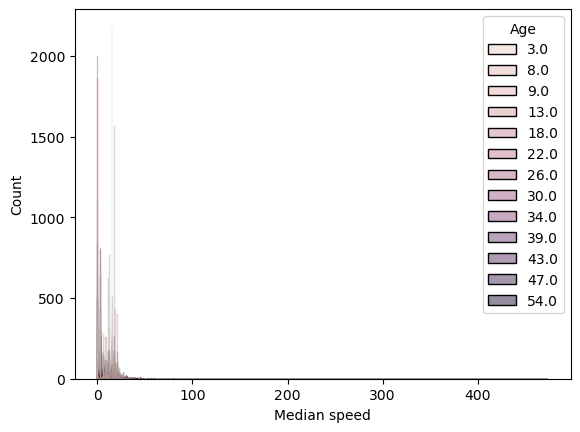

In [11]:
sns.histplot(x='Median speed',data=df,hue='Age')

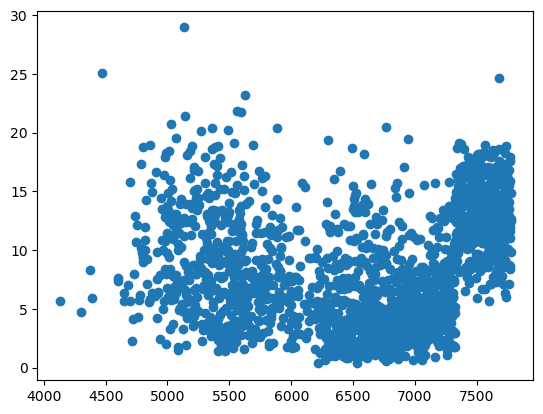

In [16]:
plt.figure()
plt.scatter(df_avg_weighted.index,df_avg_weighted['Median speed'])

<Axes: xlabel='Age', ylabel='Median speed'>

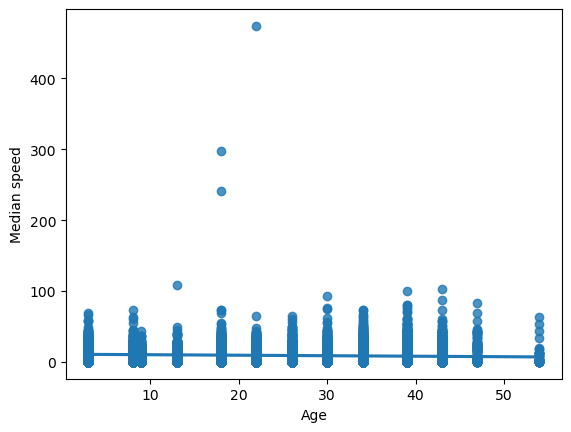

In [17]:
f,ax = plt.subplots(1,1)
sns.regplot(x='Age',y='Median speed',data=df,scatter=True,ax=ax)

# 4) Calculate Correlation among metrics
Using df_avg, calculate the correlation between the per-bee averages of ['Honey', 'Brood care', 'Frame 5', 'Median speed',
       'Dispersion (avg)', 'Exit distance (median)'].  Among these metrics, what has the highest correlation?

# 5) Calculate Average by hour
Calculate average by 'Hour' instead of by Bee unique ID.  

# 6) Plot metrics over the day
Consider the following metrics: ['Num. observations','Honey', 'Brood care', 'Frame 5', 'Median speed','Dispersion (avg)', 'Exit distance (median)']
	a) 
	b) 
	c) 

## a) Average metrics
Plot the average values over the day using a line plot

## b) Plot mean +/- standard deviation of metrics
Plot these metrics as a lineplot with error bars (i.e. the filled area) corresponding to the standard deviation among bees (hint: see Seaborn lineplot options).

## c) (bonus) Plot median and quantiles
Instead of a line for the mean and using the standard deviation for a fill area,	plot median and quantiles: a solid line for the median, and fill betwen the upper (75%) and lower (25%) quantiles.

# 7) Quantitative comparison
What quantity changed the most when comparing values over the hour 9:00-10:00 versus the hour 12:00-13:00?  Note: to compare across different metrics, need to first standardize the data, because the units are different.